# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# importing data
path = 'C:/Users/santi/HiDrive/users/santina/02_Data Analytics/Bootcamp/06_Advanced-Analytics/02_Data/Clean Data'
df = pd.read_csv(os.path.join(path, 'suicide-rates-cleaned.csv'))

# 2. Data preparation

In [7]:
# Renaming some columns for better interpretation
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [8]:
## We don't need the column "country-year", so we'll just drop it
df.drop("country-year", axis=1, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [9]:
(df.dtypes=="object").index[df.dtypes=="object"]

Index(['country', 'sex', 'age', 'gdp_for_year', 'generation'], dtype='object')

In [11]:
# Turning object types into category and integer types
df[["country","age","sex","generation"]] = df[["country","age","sex","generation"]].astype("category")

In [18]:
# Converting number strings with commas into integer
df['gdp_for_year'] = df['gdp_for_year'].str.replace(",","").astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  int8   
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  int8   
 3   age                27820 non-null  int8   
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   gdp_for_year       27820 non-null  int64  
 8   gdp_per_capita     27820 non-null  int64  
 9   generation         27820 non-null  int8   
dtypes: float64(1), int64(5), int8(4)
memory usage: 1.4 MB


In [19]:
df.dtypes

country                 int8
year                   int64
sex                     int8
age                     int8
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year           int64
gdp_per_capita         int64
generation              int8
dtype: object

In [20]:
# Using cat.codes method to convert category into numerical labels
columns = df.select_dtypes(['category']).columns
df[columns] = df[columns].apply(lambda fx: fx.cat.codes)
df.dtypes

country                 int8
year                   int64
sex                     int8
age                     int8
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year           int64
gdp_per_capita         int64
generation              int8
dtype: object

# 3. The elbow technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5.878104601437374e+28,
 -1.9467972732001545e+28,
 -7.301216961239779e+27,
 -3.947856613822514e+27,
 -2.621618997598454e+27,
 -1.763146364933623e+27,
 -1.3357093406604384e+27,
 -1.0175506813961893e+27,
 -8.035233461367395e+26]

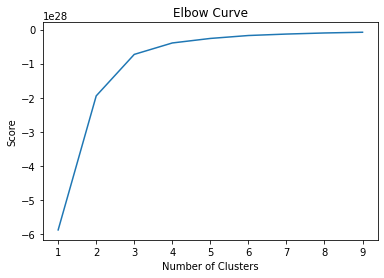

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three. 
Nevertheless, I want to cluster the number of suicides by gender, so I will use the number 2.

# 4. k-means algorithm

In [33]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2, n_jobs = -1) 

In [34]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\santi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [35]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\santi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [36]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation,clusters
0,0,1987,1,0,21,312900,6.71,2156624900,796,2,0
1,0,1987,1,2,16,308000,5.19,2156624900,796,5,0
2,0,1987,0,0,14,289700,4.83,2156624900,796,2,0
3,0,1987,1,5,1,21800,4.59,2156624900,796,1,0
4,0,1987,1,1,9,274300,3.28,2156624900,796,0,0


In [28]:
df['clusters'].value_counts()

2    26164
0     1428
1      228
Name: clusters, dtype: int64

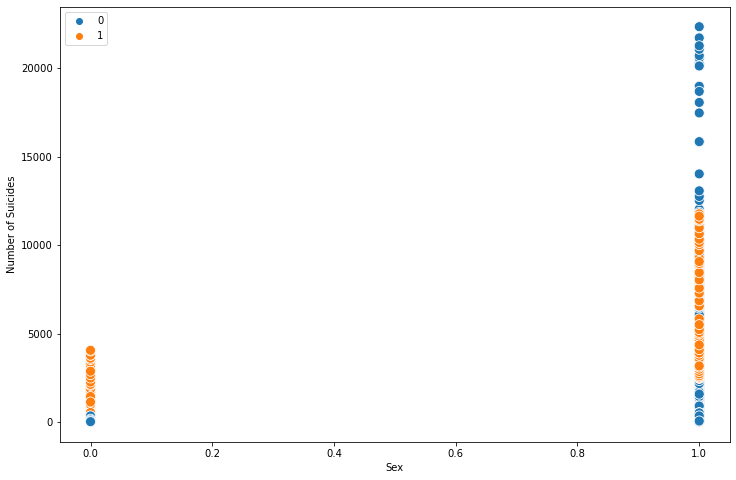

In [38]:
# Plot the clusters for the "sex" and "suicides_no" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sex'], y=df['suicides_no'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sex') # Label x-axis.
plt.ylabel('Number of Suicides') # Label y-axis.
plt.show()

In [41]:
# Create the k-means object for 5 clusters.

kmeans = KMeans(n_clusters = 5, n_jobs = -1) 

In [43]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\santi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

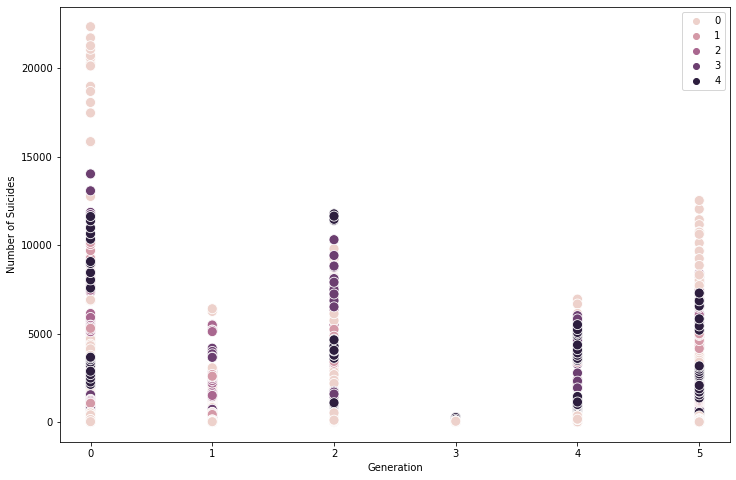

In [44]:
# Plot the clusters for the "Number of Suicides" and "Generation" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['generation'], y=df['suicides_no'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Generation') 
plt.ylabel('Number of Suicides') 
plt.show()

Both clusters make sense as there are correlations between the age groups as well as the sex and the number of suicides.

In [46]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [47]:
df.groupby('cluster').agg({'sex':['mean', 'median'], 
                         'generation':['mean', 'median'], 
                         'suicides_no':['mean', 'median']})

sex        generation         suicides_no        
        mean median       mean median         mean  median
cluster                                                   
pink     0.5    0.5   2.700947    2.0   209.446504    23.0
purple   0.5    0.5   2.772222    3.0  2769.497222  2215.0